In [ ]:
import warnings
import yfinance as yf
from matplotlib.figure import Figure
import pandas as pd 
import numpy as np 
from pandas_datareader import data as pdr
import datetime
warnings. filterwarnings('ignore')

yf.pdr_override()
start = (1980,1,4)
start = datetime.datetime(*start)
end = datetime.date.today()

data = pdr.get_data_yahoo("MSFT", start, end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...
2023-05-08,310.130005,310.200012,306.089996,308.649994,308.649994,21318600
2023-05-09,308.000000,310.040009,306.309998,307.000000,307.000000,21340800
2023-05-10,308.619995,313.000000,307.670013,312.309998,312.309998,30078000


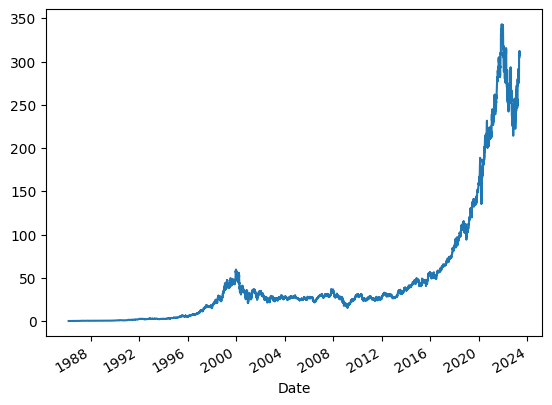

In [ ]:
close = data['Close']

close[start:end].plot();

In [ ]:
len(close)

9368

In [ ]:
start_date = '2023-03-01'
end_date = datetime.date.today()

In [ ]:
base = close[start_date:end_date]
base

Date
2023-03-01    246.270004
2023-03-02    251.110001
2023-03-03    255.289993
2023-03-06    256.869995
2023-03-07    254.149994
2023-03-08    253.699997
2023-03-09    252.320007
2023-03-10    248.589996
2023-03-13    253.919998
2023-03-14    260.790009
2023-03-15    265.440002
2023-03-16    276.200012
2023-03-17    279.429993
2023-03-20    272.230011
2023-03-21    273.779999
2023-03-22    272.290009
2023-03-23    277.660004
2023-03-24    280.570007
2023-03-27    276.380005
2023-03-28    275.230011
2023-03-29    280.510010
2023-03-30    284.049988
2023-03-31    288.299988
2023-04-03    287.230011
2023-04-04    287.179993
2023-04-05    284.339996
2023-04-06    291.600006
2023-04-10    289.390015
2023-04-11    282.829987
2023-04-12    283.489990
2023-04-13    289.839996
2023-04-14    286.140015
2023-04-17    288.799988
2023-04-18    288.369995
2023-04-19    288.450012
2023-04-20    286.109985
2023-04-21    285.760010
2023-04-24    281.769989
2023-04-25    275.420013
2023-04-26    295.36

In [ ]:
# 정규화
base_norm = (base-base.min()) / (base.max()-base.min())
base_norm 

Date
2023-03-01    0.000000
2023-03-02    0.073289
2023-03-03    0.136584
2023-03-06    0.160509
2023-03-07    0.119321
2023-03-08    0.112507
2023-03-09    0.091611
2023-03-10    0.035130
2023-03-13    0.115839
2023-03-14    0.219867
2023-03-15    0.290279
2023-03-16    0.453210
2023-03-17    0.502120
2023-03-20    0.393095
2023-03-21    0.416566
2023-03-22    0.394004
2023-03-23    0.475318
2023-03-24    0.519382
2023-03-27    0.455936
2023-03-28    0.438522
2023-03-29    0.518474
2023-03-30    0.572077
2023-03-31    0.636432
2023-04-03    0.620230
2023-04-04    0.619473
2023-04-05    0.576469
2023-04-06    0.686402
2023-04-10    0.652938
2023-04-11    0.553604
2023-04-12    0.563598
2023-04-13    0.659752
2023-04-14    0.603725
2023-04-17    0.644003
2023-04-18    0.637492
2023-04-19    0.638704
2023-04-20    0.603271
2023-04-21    0.597971
2023-04-24    0.537553
2023-04-25    0.441399
2023-04-26    0.743489
2023-04-27    0.886735
2023-04-28    0.923531
2023-05-01    0.897789
2023-0

In [ ]:
# 윈도우 사이즈
window_size = len(base)

# 예측 기간 
next_date = 5
# 검색 횟수  
moving_cnt = len(close) - window_size - next_date -1 

In [ ]:
moving_cnt

9310

In [ ]:
window_size

52

In [ ]:
def cosine_similarity(x,y): 
    return np.dot(x,y) / (np.sqrt(np.dot(x,x))* np.sqrt(np.dot(y,y)))

In [ ]:
sim_list=[]
for i in range (moving_cnt):
    target = close[i:i+window_size]
    # Normalize
    target_norm = (target - target.min()) / (target.max() - target.min())
    # 코사인 유사도 저장 
    cos_similarity = cosine_similarity(base_norm, target_norm)
    sim_list.append(cos_similarity)

In [ ]:
pd.Series(sim_list).sort_values(ascending=False).head(20)

8888    0.990291
6500    0.990195
8889    0.990148
2260    0.990072
6501    0.989932
5174    0.989711
5173    0.989347
2259    0.989323
8890    0.989295
8887    0.989137
8468    0.988941
8465    0.988751
5172    0.988700
8469    0.988519
8466    0.988333
5166    0.987999
5957    0.987939
8467    0.987831
8474    0.987763
5167    0.987560
dtype: float64

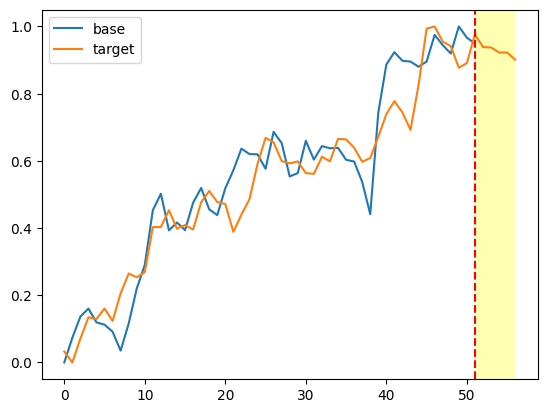

In [ ]:
import matplotlib.pyplot as plt
idx = 8888
top_ = close[idx:idx+window_size+next_date]
top_norm = (top_ - top_.min()) / (top_.max() - top_.min())

plt.plot(base_norm.values, label='base')
plt.plot(top_norm.values, label='target')
plt.axvline(x=len(base_norm)-1, c='r', linestyle='--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
plt.legend()
plt.show()

In [ ]:
class PatternFinder():
  
  def __init__(self, period=5):
      self.period = period

  def set_stock (self, code: str):     
      self.code = code
      self.data = pdr.get_data_yahoo(code)
      self.close = self.data['Close']
      self.data['Change'] = self.close.pct_change()  # 'Change'를 계산하고 데이터프레임에 추가
      self.change = self.data['Change']
      return self.data$

  def search(self, start_date, end_date, threshold=0.98):
      base = self.close[start_date:end_date]
      self.base_norm = (base - base.min()) / (base.max()-base.min())
      self.base = base

      display(base)

      window_size = len(base)
      moving_cnt = len(self.data) - window_size - self.period - 1
      cos_sims = self.__cosine_sims(moving_cnt, window_size)

      self.window_size = window_size
      cos_sims = cos_sims [cos_sims > threshold]
      return cos_sims

  def __cosine_sims (self, moving_cnt, window_size):
      def cosine_similarity(x, y):
          return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

          # 유사도 저장 딕셔너리
      sim_list = []
      for i in range(moving_cnt):
          target = self.close[i:i+window_size]
          # Normalize
          target_norm = (target - target.min()) / (target.max() - target.min())
      
          # 코사인 유사도 저장
          cos_similarity = cosine_similarity(self.base_norm, target_norm)
          # 코사인 유사도 <i(인덱스), 시계열데이터 함께 저장
          sim_list.append(cos_similarity)

      return pd.Series(sim_list).sort_values(ascending=False)
  def plot_pattern(self, idx, period=5):
      if period != self.period:
          self.period = period

      top = self.close[idx:idx+self.window_size+period]
      top_norm =  (top - top.min()) / (top.max() -top.min())

      plt.plot(self.base_norm.values, label='base')
      plt.plot(top_norm.values, label='target')
      plt.axvline(x=len(self.base_norm)-1, c='r', linestyle='--')
      plt.axvspan(len(self.base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
      plt.legend()
      plt.show()

      preds = self.change[idx+self.window_size: idx+self.window_size+period]
      display(preds)
      print(f'pred: {preds.mean()*100} %')

  def stat_prediction(self, result, period=5):
    idx_list = list(result.keys())
    mean_list = []
    for idx in idx_list:
        pred = self.change[idx+self.window_size : idx+self.window_size+period]
        mean_list.append(pred.mean())
    return np.array(mean_list)


In [ ]:
p = PatternFinder()

In [ ]:
p.set_stock('005930.KS') # 삼성전자

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.110352,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.547363,74680000,-0.086743
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250488,54390000,0.007168
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.844727,40305000,-0.014235
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.637207,46880000,0.041516
...,...,...,...,...,...,...,...
2023-05-08,66300.0,66300.0,65400.0,65900.0,65900.000000,9405365,0.012289
2023-05-09,65800.0,65800.0,65100.0,65300.0,65300.000000,9366861,-0.009105
2023-05-10,65500.0,65500.0,64300.0,64600.0,64600.000000,13057727,-0.010720


In [ ]:
result = p.search('2023-03-01','2023-05-12')

Date
2023-03-02    60800.0
2023-03-03    60500.0
2023-03-06    61500.0
2023-03-07    60700.0
2023-03-08    60300.0
2023-03-09    60100.0
2023-03-10    59500.0
2023-03-13    60000.0
2023-03-14    59000.0
2023-03-15    59800.0
2023-03-16    59900.0
2023-03-17    61300.0
2023-03-20    60200.0
2023-03-21    60300.0
2023-03-22    61100.0
2023-03-23    62300.0
2023-03-24    63000.0
2023-03-27    62100.0
2023-03-28    62900.0
2023-03-29    62700.0
2023-03-30    63200.0
2023-03-31    64000.0
2023-04-03    63100.0
2023-04-04    63600.0
2023-04-05    63900.0
2023-04-06    62300.0
2023-04-07    65000.0
2023-04-10    65700.0
2023-04-11    65900.0
2023-04-12    66000.0
2023-04-13    66100.0
2023-04-14    65100.0
2023-04-17    65300.0
2023-04-18    65600.0
2023-04-19    65500.0
2023-04-20    65300.0
2023-04-21    65700.0
2023-04-24    65200.0
2023-04-25    63600.0
2023-04-26    64100.0
2023-04-27    64600.0
2023-04-28    65500.0
2023-05-02    65700.0
2023-05-03    65400.0
2023-05-04    65100.0
2023-

In [ ]:
moving_cnt

9310

In [ ]:
result

4325    0.985255
2991    0.983801
2345    0.983700
4778    0.983629
4779    0.983446
2990    0.983070
2346    0.983010
4082    0.982866
2992    0.982083
4326    0.981870
4777    0.981351
4780    0.981241
2776    0.981019
4081    0.980877
1302    0.980552
2775    0.980333
4324    0.980172
2774    0.980116
dtype: float64

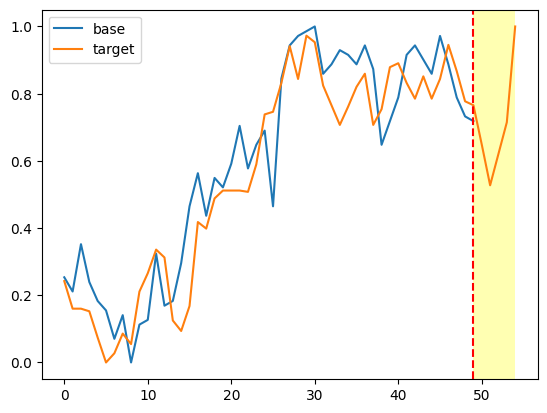

Date
2017-04-19   -0.014458
2017-04-20   -0.015159
2017-04-21    0.011917
2017-04-24    0.011776
2017-04-25    0.035403
Name: Change, dtype: float64

pred: 0.5895720286419315 %


In [ ]:
p.plot_pattern(4325)